In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [14]:
# CSV 파일 불러오기
df = pd.read_csv(r"C:\skproject\pyproject\Mall_Customers.csv")

In [15]:
# 원본 유지하면서 복사
df_processed = df.copy()

In [16]:
# 표준화 (Standardization): 'Annual Income (k$)', 'Spending Score (1-100)'
scaler_std = StandardScaler()
df_processed[['Income_std', 'Spending_std']] = scaler_std.fit_transform(
    df_processed[['Annual Income (k$)', 'Spending Score (1-100)']]
)

In [17]:
# 정규화 (Normalization): 'Annual Income (k$)', 'Spending Score (1-100)'
scaler_minmax = MinMaxScaler()
df_processed[['Income_norm', 'Spending_norm']] = scaler_minmax.fit_transform(
    df_processed[['Annual Income (k$)', 'Spending Score (1-100)']]
)

In [18]:
# 레이블 인코딩 (Label Encoding): 'Gender'
label_encoder = LabelEncoder()
df_processed['Gender_Label'] = label_encoder.fit_transform(df_processed['Gender'])
# Male: 1, Female: 0


In [19]:
# 원-핫 인코딩 (One-Hot Encoding)
onehot_encoder = OneHotEncoder()  # 구버전은 인자 없이 생성
gender_onehot = onehot_encoder.fit_transform(df_processed[['Gender_Label']])


In [20]:
# 희소 행렬을 배열로 변환
gender_onehot_array = gender_onehot.toarray()

In [21]:
# 컬럼 이름 생성
onehot_col = onehot_encoder.get_feature_names_out(['Gender_Label'])

In [22]:
# 데이터프레임으로 변환
gender_onehot_df = pd.DataFrame(gender_onehot_array, columns=onehot_col)

In [23]:
# 인덱스 맞춰주기
gender_onehot_df.index = df_processed.index

In [24]:
# 병합
df_final = pd.concat([df_processed, gender_onehot_df], axis=1)


In [25]:
# 결과 확인
print(df_final.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income_std  Spending_std  Income_norm  Spending_norm  Gender_Label  \
0   -1.738999     -0.434801     0.000000       0.387755             1   
1   -1.738999      1.195704     0.000000       0.816327             1   
2   -1.700830     -1.715913     0.008197       0.051020             0   
3   -1.700830      1.040418     0.008197       0.775510             0   
4   -1.662660     -0.395980     0.016393       0.397959             0   

   Gender_Label_0  Gender_Label_1  
0             0.0             1.0  
1             0.0             1.0  
2       

In [27]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


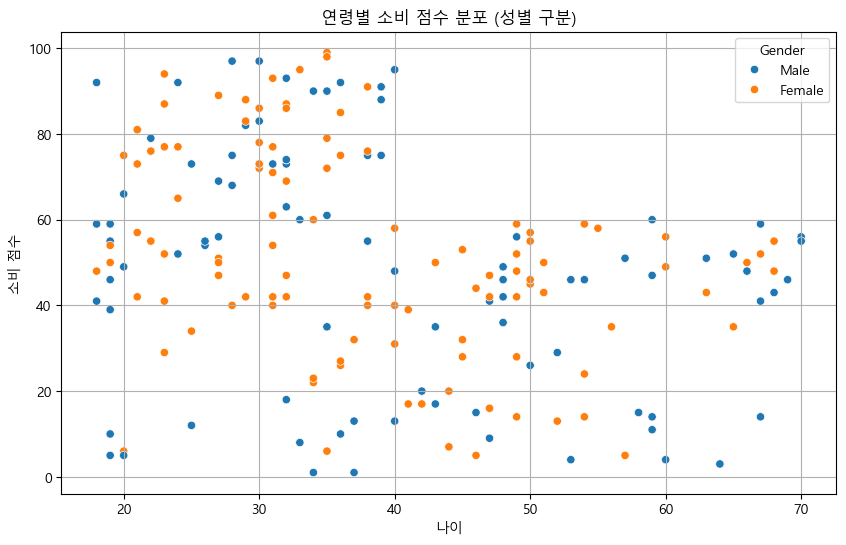

C:\Users\User\AppData\Local\Temp\ipykernel_13484\2593848031.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Gender', '연령대'])['Spending Score (1-100)'].mean().reset_index()


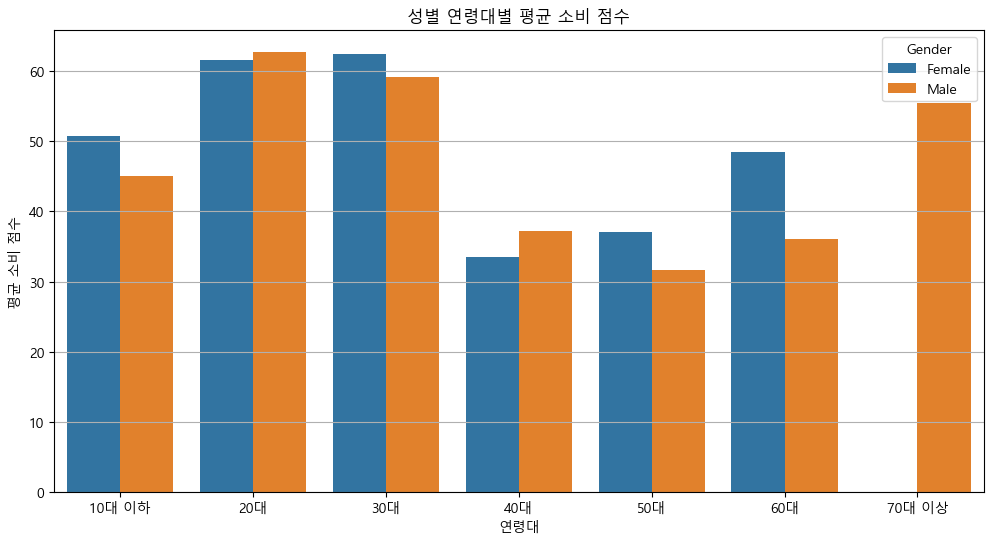

C:\Users\User\AppData\Local\Temp\ipykernel_13484\2593848031.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_age = df.groupby('연령대')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()


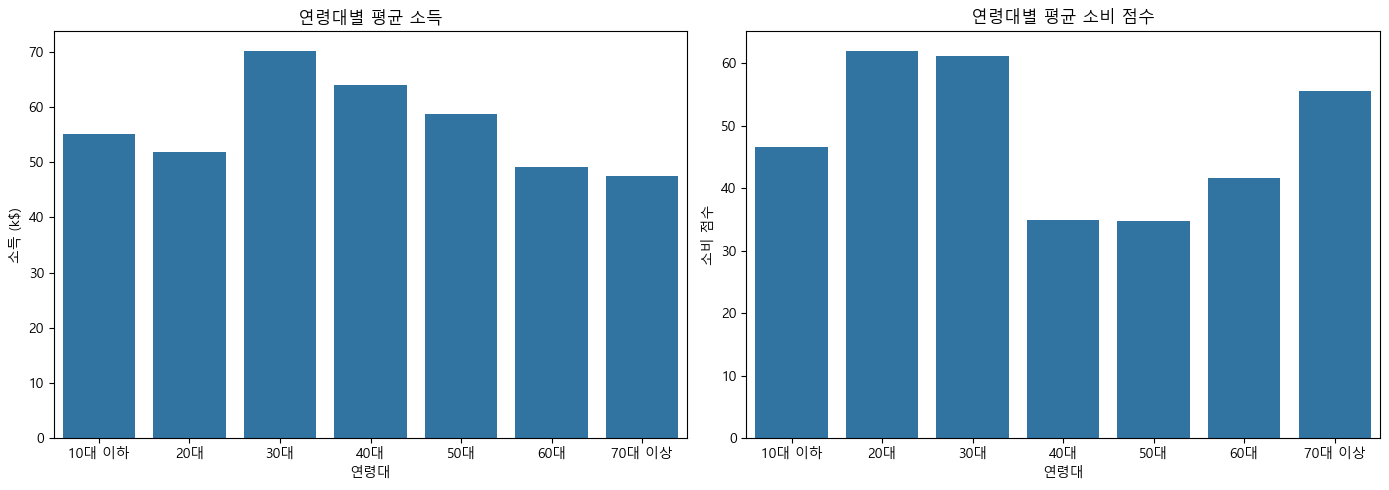

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 📌 한글 폰트 설정 (OS에 따라 다르게)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # 맥
else:
    plt.rcParams['font.family'] = 'NanumGothic'    # 리눅스 (사전 설치 필요)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 📂 데이터 불러오기
df = pd.read_csv(r"C:\skproject\pyproject\Mall_Customers.csv")

# 연령대 컬럼 생성
df['연령대'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 100],
                     labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상'])

# ✅ 1. 연령 vs 소비 점수 (성별 구분)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('연령별 소비 점수 분포 (성별 구분)')
plt.xlabel('나이')
plt.ylabel('소비 점수')
plt.grid(True)
plt.show()

# ✅ 2. 성별 + 연령대별 평균 소비 점수
grouped = df.groupby(['Gender', '연령대'])['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='연령대', y='Spending Score (1-100)', hue='Gender')
plt.title('성별 연령대별 평균 소비 점수')
plt.ylabel('평균 소비 점수')
plt.xlabel('연령대')
plt.grid(True, axis='y')
plt.show()

# ✅ 3. 연령대별 평균 소득 / 소비 점수 비교
avg_by_age = df.groupby('연령대')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=avg_by_age, x='연령대', y='Annual Income (k$)', ax=ax[0])
ax[0].set_title('연령대별 평균 소득')
ax[0].set_ylabel('소득 (k$)')

sns.barplot(data=avg_by_age, x='연령대', y='Spending Score (1-100)', ax=ax[1])
ax[1].set_title('연령대별 평균 소비 점수')
ax[1].set_ylabel('소비 점수')

plt.tight_layout()
plt.show()
